This dataset is taken from the Earthquake Repository managed by BMKG (an Indonesian non-departmental government agency). BMKG changed their site design in early 2023, and this resulted in two different datasets.

The new dataset (katalog_gempa_v2.tsv) is taken from the Preliminary Earthquake Catalog which includes focal mechanism data (if any). It contains earthquake event data from 1 Nov 2008 to 25 Nov 2024, but may not be accurate for some of the last earthquake events recorded. There are 38 variables in this dataset, each with a descriptive name. <src>(Source : https://github.com/kekavigi/repo-gempa)

# Import the libraries and dataset

In [196]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from plotly.figure_factory import create_distplot
from plotly.subplots import make_subplots

In [197]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [198]:
# Load the earthquake dataset
df = pd.read_table('gdrive/My Drive/Colab Notebooks/Data for Analyst/katalog_gempa_v2.tsv')

<ipython-input-198-e93bcd93b050>:2: DtypeWarning:

Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.



In [199]:
df.head(10)

eventID                          datetime  latitude   longitude  \
0  bmg2008vkye  2008-11-01 00:31:25.143741+00:00 -0.604440   98.895531   
1  bmg2008vlag  2008-11-01 01:34:29.660856+00:00 -6.611860  129.387220   
2  bmg2008vlaj  2008-11-01 01:38:14.802129+00:00 -3.650586  127.990680   
3  bmg2008vlbt  2008-11-01 02:20:05.909515+00:00 -4.198925  128.097000   
4  bmg2008vlcd  2008-11-01 02:32:18.756155+00:00 -4.091891  128.200470   
5  bmg2008vldw  2008-11-01 03:24:09.020131+00:00 -3.755193  127.382280   
6  bmg2008vlef  2008-11-01 03:34:47.510883+00:00 -3.889478  128.243190   
7  bmg2008vlfx  2008-11-01 04:26:50.151996+00:00  0.486772   98.328484   
8  bmg2008vlja  2008-11-01 06:01:05.398042+00:00 -4.264244  127.661870   
9  bmg2008vljt  2008-11-01 06:23:00.287751+00:00 -3.432654  128.388600   

   magnitude mag_type  depth  phasecount  azimuth_gap  \
0   2.989742      MLv     20         6.0    146.70738   
1   5.507549       mb     30        62.0     45.46764   
2   3.539674      MLv      5         4.0    331.97404   
3   2.424314      MLv      5         5.0    326.37993   
4   2.410045      MLv     10         5.0    314.65474   
5   2.938879      MLv     10         4.0    350.03813   
6   2.218964      MLv     10         4.0    294.60504   
7   3.853423      MLv     16         7.0    251.06932   
8   3.243451      MLv     10         5.0    348.60759   
9   2.317467      MLv     10         4.0    223.48315   

                      location  ... doubleCouple clvd  strikeNP1  dipNP1  \
0  Southern Sumatra, Indonesia  ...          NaN  NaN        NaN     NaN   
1                    Banda Sea  ...          NaN  NaN        NaN     NaN   
2             Seram, Indonesia  ...          NaN  NaN        NaN     NaN   
3                    Banda Sea  ...          NaN  NaN        NaN     NaN   
4                    Banda Sea  ...          NaN  NaN        NaN     NaN   
5             Seram, Indonesia  ...          NaN  NaN        NaN     NaN   
6             Seram, Indonesia  ...          NaN  NaN        NaN     NaN   
7  Northern Sumatra, Indonesia  ...          NaN  NaN        NaN     NaN   
8                    Banda Sea  ...          NaN  NaN        NaN     NaN   
9             Seram, Indonesia  ...          NaN  NaN        NaN     NaN   

   rakeNP1 strikeNP2  dipNP2  rakeNP2  azgapFM  misfit  
0      NaN       NaN     NaN      NaN      NaN     NaN  
1      NaN       NaN     NaN      NaN      NaN     NaN  
2      NaN       NaN     NaN      NaN      NaN     NaN  
3      NaN       NaN     NaN      NaN      NaN     NaN  
4      NaN       NaN     NaN      NaN      NaN     NaN  
5      NaN       NaN     NaN      NaN      NaN     NaN  
6      NaN       NaN     NaN      NaN      NaN     NaN  
7      NaN       NaN     NaN      NaN      NaN     NaN  
8      NaN       NaN     NaN      NaN      NaN     NaN  
9      NaN       NaN     NaN      NaN      NaN     NaN  

[10 rows x 37 columns]

In [200]:
df.tail()

eventID                          datetime  latitude   longitude  \
117246  bmg2024xdfu  2024-11-25 01:39:36.657199+00:00 -9.609527  118.552315   
117247  bmg2024xdgj  2024-11-25 01:56:22.450273+00:00  1.494929  128.375214   
117248  bmg2024xdgx  2024-11-25 02:13:37.208619+00:00  1.187977  124.155006   
117249  bmg2024xdie  2024-11-25 02:51:49.605606+00:00 -9.976059  118.790207   
117250  bmg2024xdlm  2024-11-25 04:31:41.488329+00:00  3.235618   96.341194   

        magnitude mag_type  depth  phasecount  azimuth_gap  \
117246   3.496290        M     43        20.0   197.765923   
117247   2.760152        M     10        11.0   184.779053   
117248   3.587475        M     10        20.0   165.923042   
117249   3.937111        M     10        31.0   199.995628   
117250   3.221563        M     10        18.0   230.370857   

                             location  ... doubleCouple clvd  strikeNP1  \
117246      Sumbawa Region, Indonesia  ...          NaN  NaN        NaN   
117247           Halmahera, Indonesia  ...          NaN  NaN        NaN   
117248  Minahassa Peninsula, Sulawesi  ...          NaN  NaN        NaN   
117249      Sumbawa Region, Indonesia  ...          NaN  NaN        NaN   
117250    Northern Sumatra, Indonesia  ...          NaN  NaN        NaN   

        dipNP1  rakeNP1 strikeNP2  dipNP2  rakeNP2  azgapFM  misfit  
117246     NaN      NaN       NaN     NaN      NaN      NaN     NaN  
117247     NaN      NaN       NaN     NaN      NaN      NaN     NaN  
117248     NaN      NaN       NaN     NaN      NaN      NaN     NaN  
117249     NaN      NaN       NaN     NaN      NaN      NaN     NaN  
117250     NaN      NaN       NaN     NaN      NaN      NaN     NaN  

[5 rows x 37 columns]

In [201]:
# Print the datatypes of all variables
df.dtypes

eventID               object
datetime              object
latitude             float64
longitude            float64
magnitude            float64
mag_type              object
depth                  int64
phasecount           float64
azimuth_gap          float64
location              object
agency                object
datetimeFM            object
latFM                float64
lonFM                float64
magFM                float64
magTypeFM             object
depthFM              float64
phasecountFM         float64
AzGapFM              float64
scalarMoment         float64
Mrr                  float64
Mtt                  float64
Mpp                  float64
Mrt                  float64
Mrp                  float64
Mtp                  float64
varianceReduction    float64
doubleCouple         float64
clvd                 float64
strikeNP1            float64
dipNP1               float64
rakeNP1              float64
strikeNP2            float64
dipNP2               float64
rakeNP2              float64
azgapFM              float64
misfit               float64
dtype: object

In [130]:
#Change the datatype of variable datetime to datetime format
df['datetime'] = pd.to_datetime(df['datetime'],format='mixed')

## Date string manipulations

In [131]:
# Create four new columns: date, week, month, and year
df['date'] = pd.to_datetime(df['datetime'].dt.date)
df['week'] = df['datetime'].dt.strftime('W%V')
df['month'] = df['datetime'].dt.strftime('%m')
df['year'] = df['datetime'].dt.strftime('%Y')

### Descriptive statistics

In [132]:
# Numerical variables
df.describe()

latitude      longitude      magnitude          depth  \
count  117251.000000  117251.000000  116727.000000  117251.000000   
mean       -3.374071     119.190727       3.582797      51.144067   
min       -10.999324      95.002388       0.638354       0.000000   
25%        -7.838330     112.892929       2.991485      10.000000   
50%        -2.885095     121.290794       3.522375      17.000000   
75%         0.165438     126.889198       4.151254      56.000000   
max         5.999397     140.998291       7.923472     750.000000   
std         4.345128      10.832582       0.813087      81.800871   

          phasecount    azimuth_gap        latFM        lonFM        magFM  \
count  117249.000000  117247.000000  4014.000000  4014.000000  3490.000000   
mean       23.048461     149.892416    -3.095018   119.613544     4.874762   
min         1.000000       9.277467   -11.210044    94.798943     2.223048   
25%        10.000000      99.387251    -7.075107   108.729485     4.543422   
50%        15.000000     144.035370    -3.287028   123.493050     4.860498   
75%        25.000000     197.196050     0.575678   128.228573     5.178991   
max      1268.000000     360.000000     6.241225   140.971100     7.580354   
std        31.360713      62.648455     4.497331    11.978139     0.598714   

           depthFM  ...          clvd    strikeNP1       dipNP1      rakeNP1  \
count  4014.000000  ...  3.864000e+03  4014.000000  4014.000000  4014.000000   
mean     74.328351  ...  2.509576e-01   172.900923    60.563158    26.320164   
min       0.000000  ...  3.184213e-16     0.000000     1.289494  -179.990969   
25%      13.000000  ...  9.150463e-02   107.566824    46.970668   -47.340290   
50%      40.000000  ...  2.036234e-01   147.302705    63.686122    51.824744   
75%      91.000000  ...  3.595169e-01   229.094574    77.252934   100.980372   
max     690.000000  ...  9.711943e-01   359.984315    90.000000   180.000000   
std     102.944784  ...  2.014993e-01    90.422602    20.171219   102.828693   

         strikeNP2       dipNP2      rakeNP2      azgapFM       misfit  \
count  4014.000000  4014.000000  4014.000000  3864.000000  3861.000000   
mean    193.717238    57.075261    29.884985   149.672363     0.227771   
min       0.000000     0.522594  -179.993131     0.000000     0.027210   
25%      60.377014    40.493281   -30.024263    87.855129     0.161541   
50%     234.074973    59.683007    44.010426   141.038101     0.218361   
75%     293.134504    75.422177   108.933279   203.688714     0.279602   
max     359.983704    90.000000   180.000000   360.000000     1.039897   
std     118.584251    21.701023    99.525949    75.500709     0.101124   

                                date  
count                         117251  
mean   2018-04-15 11:37:25.981697536  
min              2008-11-01 00:00:00  
25%              2014-12-14 00:00:00  
50%              2019-02-19 00:00:00  
75%              2021-12-14 00:00:00  
max              2024-11-25 00:00:00  
std                              NaN  

[8 rows x 31 columns]

In [133]:
# Non-numerical variables
df.describe(exclude=np.number)

eventID                             datetime mag_type  \
count        117251                               117251   116727   
unique       117251                                  NaN        9   
top     bmg2008vkye                                  NaN        M   
freq              1                                  NaN    58550   
mean            NaN  2018-04-16 00:09:07.305737472+00:00      NaN   
min             NaN     2008-11-01 00:31:25.143741+00:00      NaN   
25%             NaN  2014-12-14 13:39:03.364782080+00:00      NaN   
50%             NaN  2019-02-19 08:35:20.327877888+00:00      NaN   
75%             NaN  2021-12-14 12:57:49.390737408+00:00      NaN   
max             NaN     2024-11-25 04:31:41.488329+00:00      NaN   

                             location  agency                   datetimeFM  \
count                          117237  113805                         4014   
unique                             56       2                         4014   
top     Minahassa Peninsula, Sulawesi    BMKG  2011-06-26T12:16:38.051947Z   
freq                            12220   77839                            1   
mean                              NaN     NaN                          NaN   
min                               NaN     NaN                          NaN   
25%                               NaN     NaN                          NaN   
50%                               NaN     NaN                          NaN   
75%                               NaN     NaN                          NaN   
max                               NaN     NaN                          NaN   

       magTypeFM                           date    week   month    year  
count       3490                         117251  117251  117251  117251  
unique         7                            NaN      53      12      17  
top           Mw                            NaN     W39      11    2019  
freq        1439                            NaN    2900   11447   11499  
mean         NaN  2018-04-15 11:37:25.981697536     NaN     NaN     NaN  
min          NaN            2008-11-01 00:00:00     NaN     NaN     NaN  
25%          NaN            2014-12-14 00:00:00     NaN     NaN     NaN  
50%          NaN            2019-02-19 00:00:00     NaN     NaN     NaN  
75%          NaN            2021-12-14 00:00:00     NaN     NaN     NaN  
max          NaN            2024-11-25 00:00:00     NaN     NaN     NaN

In [134]:
df_used = df.loc[:, ['datetime', 'latitude', 'longitude', 'magnitude', 'mag_type', 'depth', 'location', 'date', 'week', 'month', 'year']]

## Handle missing values (NaN)

In [135]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117251 entries, 0 to 117250
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   datetime   117251 non-null  datetime64[ns, UTC]
 1   latitude   117251 non-null  float64            
 2   longitude  117251 non-null  float64            
 3   magnitude  116727 non-null  float64            
 4   mag_type   116727 non-null  object             
 5   depth      117251 non-null  int64              
 6   location   117237 non-null  object             
 7   date       117251 non-null  datetime64[ns]     
 8   week       117251 non-null  object             
 9   month      117251 non-null  object             
 10  year       117251 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 9.8+ MB


Missing values are in `magnitude`, `mag_type`, and `location`.

we will remove all missing values in `magnitude` and `mag_type` for accuracy instead of guessing and imputing values.

However, we can use the complete values in `latitude` and `longitude` to fill in the missing values for `location`.

In [136]:
#Remove missing value in magnitude and mag_type
df_used = df_used.dropna(subset=['magnitude', 'mag_type']).reset_index(drop=True)

In [137]:
#location NaN
df_used[df_used['location'].isnull()]

datetime  latitude   longitude  magnitude  \
47957  2018-01-29 01:48:03.419591+00:00 -5.597167  131.062653   4.563511   
103244 2023-05-10 12:37:50.902814+00:00 -6.470338  104.899498   3.668006   
103355 2023-05-15 12:07:48.386638+00:00  2.286858  128.382523   3.253800   
103573 2023-05-25 12:29:06.648422+00:00 -7.816572  123.220772   3.843977   
106029 2023-08-28 02:06:23.175708+00:00 -3.785883  140.254044   4.196940   
108004 2023-11-06 13:08:08.518658+00:00 -1.383827  126.358292   4.543817   
108418 2023-11-15 17:29:02.280576+00:00  1.927599  127.283226   3.182900   
108939 2023-11-29 16:19:44.205363+00:00 -8.818794  110.347984   3.028151   
111980 2024-03-17 23:41:41.796105+00:00  4.833991  127.313408   4.892852   
113791 2024-06-10 10:41:15.154822+00:00  1.186023  126.181114   4.394371   
113792 2024-06-10 13:30:13.471540+00:00 -2.533998  120.778206   2.710535   
115299 2024-09-12 07:36:02.588970+00:00 -9.466758  122.753990   3.199871   

       mag_type  depth location       date week month  year  
47957       MLv     67      NaN 2018-01-29  W05    01  2018  
103244      MLv     10      NaN 2023-05-10  W19    05  2023  
103355      MLv    210      NaN 2023-05-15  W20    05  2023  
103573        M     11      NaN 2023-05-25  W21    05  2023  
106029      MLv     10      NaN 2023-08-28  W35    08  2023  
108004      MLv     12      NaN 2023-11-06  W45    11  2023  
108418      MLv     89      NaN 2023-11-15  W46    11  2023  
108939        M     18      NaN 2023-11-29  W48    11  2023  
111980       mb    115      NaN 2024-03-17  W11    03  2024  
113791        M     32      NaN 2024-06-10  W24    06  2024  
113792        M      8      NaN 2024-06-10  W24    06  2024  
115299        M     28      NaN 2024-09-12  W37    09  2024

###NaN 1

In [138]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']>-5.65) & (df_used['latitude']<-5.55) & (df_used['longitude']>131.01) & (df_used['longitude']<131.11)]

datetime  latitude   longitude  magnitude  \
22623 2013-05-21 12:39:25.323901+00:00 -5.588592  131.107452   4.833094   
31549 2015-05-29 21:26:36.320428+00:00 -5.635509  131.054932   4.597885   
35935 2016-03-09 13:10:48.435820+00:00 -5.609391  131.094727   4.078789   
38003 2016-07-22 08:57:49.367405+00:00 -5.640035  131.030899   4.171650   
46817 2017-12-03 19:20:48.867866+00:00 -5.563290  131.066391   4.099118   
47957 2018-01-29 01:48:03.419591+00:00 -5.597167  131.062653   4.563511   
48367 2018-02-16 09:49:09.541212+00:00 -5.557742  131.048660   4.181103   
49588 2018-04-02 17:18:12.099446+00:00 -5.589219  131.102554   4.039758   
64813 2019-10-05 19:08:44.152469+00:00 -5.591916  131.043823   4.344014   
71106 2020-05-10 01:28:17.589750+00:00 -5.594520  131.063782   4.398475   
84439 2021-09-03 14:25:38.518739+00:00 -5.606062  131.101318   4.724758   

      mag_type  depth   location       date week month  year  
22623       mb     54  Banda Sea 2013-05-21  W21    05  2013  
31549       mb    137  Banda Sea 2015-05-29  W22    05  2015  
35935      MLv    176  Banda Sea 2016-03-09  W10    03  2016  
38003      MLv     90  Banda Sea 2016-07-22  W29    07  2016  
46817      MLv     33  Banda Sea 2017-12-03  W48    12  2017  
47957      MLv     67        NaN 2018-01-29  W05    01  2018  
48367      MLv    123  Banda Sea 2018-02-16  W07    02  2018  
49588      MLv    133  Banda Sea 2018-04-02  W14    04  2018  
64813        M    118  Banda Sea 2019-10-05  W40    10  2019  
71106        M    127  Banda Sea 2020-05-10  W19    05  2020  
84439        M     19  Banda Sea 2021-09-03  W35    09  2021

Locations with latitude degress -5.65 to -5.55 and longitude degress 131.01 to 131.11 are at **Banda Sea**.

In [139]:
#input NaN location in row 47957 with "Banda Sea"
df_used.loc[47957, 'location'] = 'Banda Sea'
df_used.loc[[47957]]

datetime  latitude   longitude  magnitude  \
47957 2018-01-29 01:48:03.419591+00:00 -5.597167  131.062653   4.563511   

      mag_type  depth   location       date week month  year  
47957      MLv     67  Banda Sea 2018-01-29  W05    01  2018

###NaN 2

In [140]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']>-6.55) & (df_used['latitude']<-6.40) & (df_used['longitude']>104.85) & (df_used['longitude']<104.95)]

datetime  latitude   longitude  magnitude  \
3774   2009-12-28 20:59:53.979516+00:00 -6.420052  104.878020   3.282102   
3800   2009-12-29 21:11:40.477829+00:00 -6.466555  104.889560   3.436471   
8789   2010-10-19 20:49:09.609531+00:00 -6.544393  104.912350   4.885245   
21343  2013-02-04 19:54:32.975257+00:00 -6.546415  104.925552   3.504174   
29847  2015-01-30 05:34:57.142809+00:00 -6.487286  104.854614   3.611603   
33433  2015-10-29 18:18:27.212593+00:00 -6.532664  104.860931   3.516260   
34964  2016-01-12 18:34:04.646830+00:00 -6.428318  104.858505   3.161755   
34967  2016-01-12 20:00:09.278605+00:00 -6.402349  104.905785   3.006997   
39940  2016-12-07 04:13:37.675631+00:00 -6.513273  104.933189   4.080399   
43585  2017-06-28 10:41:35.258527+00:00 -6.503450  104.855827   4.656134   
43587  2017-06-28 11:14:25.920842+00:00 -6.511501  104.930611   4.119827   
51708  2018-07-21 14:28:53.031005+00:00 -6.464591  104.935600   3.116366   
60484  2019-04-30 05:13:41.651853+00:00 -6.415683  104.897026   3.346843   
70884  2020-04-29 09:32:15.733358+00:00 -6.491091  104.945900   3.226237   
71743  2020-06-07 13:11:37.971680+00:00 -6.421339  104.922470   4.008778   
71744  2020-06-07 13:21:48.025703+00:00 -6.414506  104.940476   3.601436   
72050  2020-06-18 11:52:32.349040+00:00 -6.413348  104.912140   3.878445   
72051  2020-06-18 12:33:17.748582+00:00 -6.400508  104.936806   3.292783   
72053  2020-06-18 13:53:17.979891+00:00 -6.463894  104.921028   4.005575   
77508  2021-01-15 02:56:04.372871+00:00 -6.486739  104.905266   3.220659   
81453  2021-05-24 22:54:23.357010+00:00 -6.476995  104.869644   3.101067   
82910  2021-07-08 15:18:11.393593+00:00 -6.524351  104.853409   4.579291   
91044  2022-03-27 16:11:08.839626+00:00 -6.456019  104.912239   3.354503   
95479  2022-09-30 12:57:35.245642+00:00 -6.448777  104.909889   4.346000   
96351  2022-10-30 06:03:24.509742+00:00 -6.501050  104.912582   3.200650   
103226 2023-05-10 09:45:32.629101+00:00 -6.489013  104.873276   3.735642   
103227 2023-05-10 10:03:32.205480+00:00 -6.459978  104.902298   4.756445   
103228 2023-05-10 10:05:44.140620+00:00 -6.417006  104.929894   4.105029   
103229 2023-05-10 10:07:15.723187+00:00 -6.467266  104.881844   4.056280   
103230 2023-05-10 10:09:34.191626+00:00 -6.437741  104.913590   3.797729   
103231 2023-05-10 10:11:49.050962+00:00 -6.463938  104.883636   3.756823   
103232 2023-05-10 10:16:44.475568+00:00 -6.499385  104.884476   3.855839   
103234 2023-05-10 10:31:41.049917+00:00 -6.453719  104.918129   3.721146   
103235 2023-05-10 10:34:58.679190+00:00 -6.451093  104.907303   3.647040   
103236 2023-05-10 10:38:24.360590+00:00 -6.478329  104.914309   4.540927   
103238 2023-05-10 10:57:26.129051+00:00 -6.463018  104.902367   3.382394   
103239 2023-05-10 11:04:47.745805+00:00 -6.463603  104.895943   3.587573   
103240 2023-05-10 11:13:22.905473+00:00 -6.452742  104.921730   3.408750   
103241 2023-05-10 11:27:58.296669+00:00 -6.434803  104.904953   3.501963   
103242 2023-05-10 12:21:26.343913+00:00 -6.475639  104.876587   3.798329   
103244 2023-05-10 12:37:50.902814+00:00 -6.470338  104.899498   3.668006   
103251 2023-05-10 18:57:52.237909+00:00 -6.472511  104.913734   3.324038   
103252 2023-05-10 19:03:49.511668+00:00 -6.404048  104.936066   3.606332   
103253 2023-05-10 19:18:26.407778+00:00 -6.440946  104.928368   2.843546   
103270 2023-05-11 16:04:21.883473+00:00 -6.416668  104.883331   4.384569   
103271 2023-05-11 17:46:46.199456+00:00 -6.425523  104.875290   3.456834   
103274 2023-05-11 19:41:20.930821+00:00 -6.470606  104.888969   3.212156   
103308 2023-05-13 03:46:43.260835+00:00 -6.474021  104.917496   4.105378   
103314 2023-05-13 13:27:21.049295+00:00 -6.504466  104.895179   4.110234   
103321 2023-05-13 18:29:21.614150+00:00 -6.441443  104.920265   3.314727   
103655 2023-05-28 14:23:09.567790+00:00 -6.460288  104.914604   3.155529   
104505 2023-06-27 19:13:08.064632+00:00 -6.478010  104.910316   3.880385   
106

In [141]:
df_used.loc[103244, 'location'] = 'Sunda Strait, Indonesia'
df_used.loc[[103244]]

datetime  latitude   longitude  magnitude  \
103244 2023-05-10 12:37:50.902814+00:00 -6.470338  104.899498   3.668006   

       mag_type  depth                 location       date week month  year  
103244      MLv     10  Sunda Strait, Indonesia 2023-05-10  W19    05  2023

###NaN 3

In [142]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']<2.3) & (df_used['latitude']>2.2) & (df_used['longitude']>128.30) & (df_used['longitude']<128.40)]

datetime  latitude   longitude  magnitude  \
1162   2009-03-26 00:57:17.126487+00:00  2.257643  128.397130   4.143477   
7794   2010-08-09 18:32:41.368318+00:00  2.265186  128.350770   3.436705   
29193  2014-12-08 15:53:07.576777+00:00  2.282452  128.344589   4.268556   
48441  2018-02-19 14:21:54.563925+00:00  2.247871  128.365356   4.072577   
49386  2018-03-23 16:24:33.065536+00:00  2.227720  128.341949   3.904753   
50014  2018-04-23 06:35:54.491596+00:00  2.260188  128.381790   4.609120   
60455  2019-04-29 12:18:16.231771+00:00  2.214560  128.397919   3.606607   
77411  2021-01-12 11:51:32.331412+00:00  2.217624  128.370743   4.541743   
98889  2023-01-04 11:31:39.098524+00:00  2.208376  128.352127   3.678669   
102841 2023-04-28 04:26:15.009231+00:00  2.285955  128.356064   3.359029   
103355 2023-05-15 12:07:48.386638+00:00  2.286858  128.382523   3.253800   
104645 2023-07-02 01:44:09.056867+00:00  2.260193  128.321198   3.473566   

       mag_type  depth              location       date week month  year  
1162         mb    228  Halmahera, Indonesia 2009-03-26  W13    03  2009  
7794          M    216  Halmahera, Indonesia 2010-08-09  W32    08  2010  
29193       MLv     10  Halmahera, Indonesia 2014-12-08  W50    12  2014  
48441       MLv    228  Halmahera, Indonesia 2018-02-19  W08    02  2018  
49386       MLv    253  Halmahera, Indonesia 2018-03-23  W12    03  2018  
50014       MLv    230  Halmahera, Indonesia 2018-04-23  W17    04  2018  
60455       MLv     44  Halmahera, Indonesia 2019-04-29  W18    04  2019  
77411         M    222  Halmahera, Indonesia 2021-01-12  W02    01  2021  
98889         M     18  Halmahera, Indonesia 2023-01-04  W01    01  2023  
102841      MLv    212  Halmahera, Indonesia 2023-04-28  W17    04  2023  
103355      MLv    210                   NaN 2023-05-15  W20    05  2023  
104645      MLv    209  Halmahera, Indonesia 2023-07-02  W26    07  2023

In [143]:
df_used.loc[103355, 'location'] = 'Halmahera, Indonesia'
df_used.loc[[103355]]

datetime  latitude   longitude  magnitude  \
103355 2023-05-15 12:07:48.386638+00:00  2.286858  128.382523     3.2538   

       mag_type  depth              location       date week month  year  
103355      MLv    210  Halmahera, Indonesia 2023-05-15  W20    05  2023

###NaN 4

In [144]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']<-7.80) & (df_used['latitude']>-7.90) & (df_used['longitude']>123.20) & (df_used['longitude']<123.30)]

datetime  latitude   longitude  magnitude  \
27786  2014-09-01 06:20:43.177159+00:00 -7.894989  123.222763   3.524615   
82158  2021-06-14 01:06:11.168152+00:00 -7.861360  123.200211   4.568950   
89775  2022-02-17 17:18:26.208726+00:00 -7.870017  123.260849   2.836508   
103572 2023-05-25 12:21:07.922044+00:00 -7.878074  123.226585   4.745853   
103573 2023-05-25 12:29:06.648422+00:00 -7.816572  123.220772   3.843977   
110840 2024-01-28 19:39:11.890785+00:00 -7.821149  123.276619   4.164048   

       mag_type  depth   location       date week month  year  
27786       MLv    159  Banda Sea 2014-09-01  W36    09  2014  
82158         M    230  Banda Sea 2021-06-14  W24    06  2021  
89775         M    214  Banda Sea 2022-02-17  W07    02  2022  
103572       Mw     10  Banda Sea 2023-05-25  W21    05  2023  
103573        M     11        NaN 2023-05-25  W21    05  2023  
110840      MLv    247  Banda Sea 2024-01-28  W04    01  2024

In [145]:
df_used.loc[103573, 'location'] = 'Banda Sea'
df_used.loc[[103573]]

datetime  latitude   longitude  magnitude  \
103573 2023-05-25 12:29:06.648422+00:00 -7.816572  123.220772   3.843977   

       mag_type  depth   location       date week month  year  
103573        M     11  Banda Sea 2023-05-25  W21    05  2023

###NaN 5

In [146]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']<-3.75) & (df_used['latitude']>-3.8) & (df_used['longitude']>140.2) & (df_used['longitude']<140.3)]

datetime  latitude   longitude  magnitude  \
104927 2023-07-13 09:08:24.217790+00:00 -3.777973  140.279633   5.267159   
104928 2023-07-13 09:11:57.982834+00:00 -3.784402  140.223496   5.148984   
106029 2023-08-28 02:06:23.175708+00:00 -3.785883  140.254044   4.196940   

       mag_type  depth               location       date week month  year  
104927      MLv     10  West Papua, Indonesia 2023-07-13  W28    07  2023  
104928       mb     15  West Papua, Indonesia 2023-07-13  W28    07  2023  
106029      MLv     10                    NaN 2023-08-28  W35    08  2023

In [147]:
df_used.loc[106029, 'location'] = 'West Papua, Indonesia'
df_used.loc[[106029]]

datetime  latitude   longitude  magnitude  \
106029 2023-08-28 02:06:23.175708+00:00 -3.785883  140.254044    4.19694   

       mag_type  depth               location       date week month  year  
106029      MLv     10  West Papua, Indonesia 2023-08-28  W35    08  2023

###NaN 6

In [148]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']<-1.35) & (df_used['latitude']>-1.4) & (df_used['longitude']>126.3) & (df_used['longitude']<126.4)]

datetime  latitude   longitude  magnitude  \
105063 2023-07-18 18:08:16.260901+00:00 -1.391802  126.389603   3.298864   
105130 2023-07-20 05:05:17.561457+00:00 -1.354777  126.303635   3.357425   
105137 2023-07-20 09:07:48.668510+00:00 -1.376246  126.368835   4.419935   
105141 2023-07-20 10:11:42.597725+00:00 -1.380557  126.338203   3.766861   
108004 2023-11-06 13:08:08.518658+00:00 -1.383827  126.358292   4.543817   
108412 2023-11-15 13:40:58.248333+00:00 -1.367201  126.378181   3.412732   
110647 2024-01-23 21:45:29.399138+00:00 -1.397581  126.359978   3.990538   

       mag_type  depth              location       date week month  year  
105063      MLv     10  Southern Molucca Sea 2023-07-18  W29    07  2023  
105130      MLv     10  Southern Molucca Sea 2023-07-20  W29    07  2023  
105137      MLv     10  Southern Molucca Sea 2023-07-20  W29    07  2023  
105141      MLv     10  Southern Molucca Sea 2023-07-20  W29    07  2023  
108004      MLv     12                   NaN 2023-11-06  W45    11  2023  
108412      MLv     10  Southern Molucca Sea 2023-11-15  W46    11  2023  
110647      MLv     14  Southern Molucca Sea 2024-01-23  W04    01  2024

In [149]:
df_used.loc[108004, 'location'] = 'Southern Molucca Sea'
df_used.loc[[108004]]

datetime  latitude   longitude  magnitude  \
108004 2023-11-06 13:08:08.518658+00:00 -1.383827  126.358292   4.543817   

       mag_type  depth              location       date week month  year  
108004      MLv     12  Southern Molucca Sea 2023-11-06  W45    11  2023

###NaN 7

In [150]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']<1.95) & (df_used['latitude']>1.9) & (df_used['longitude']>127.25) & (df_used['longitude']<127.3)]

datetime  latitude   longitude  magnitude  \
4527   2010-02-17 00:45:44.258993+00:00  1.926279  127.260490   4.675341   
4955   2010-03-12 19:29:46.343562+00:00  1.907939  127.287520   3.316848   
13263  2011-10-27 13:49:13.997731+00:00  1.931882  127.280310   4.390279   
74524  2020-09-25 19:28:47.177410+00:00  1.915069  127.255173   4.509317   
74533  2020-09-25 20:57:12.770642+00:00  1.924133  127.283714   2.701062   
84430  2021-09-03 01:55:48.068123+00:00  1.922180  127.287003   4.113449   
91253  2022-04-04 04:01:46.639204+00:00  1.917555  127.270683   3.652395   
100971 2023-03-05 17:13:48.912635+00:00  1.938773  127.271156   3.644267   
108418 2023-11-15 17:29:02.280576+00:00  1.927599  127.283226   3.182900   
111359 2024-02-18 19:13:46.405769+00:00  1.901541  127.259644   3.339067   
114492 2024-07-26 09:25:51.342927+00:00  1.911774  127.266304   3.810233   

       mag_type  depth              location       date week month  year  
4527        MLv    115  Halmahera, Indonesia 2010-02-17  W07    02  2010  
4955        MLv     71  Halmahera, Indonesia 2010-03-12  W10    03  2010  
13263         M     85  Halmahera, Indonesia 2011-10-27  W43    10  2011  
74524       MLv     96  Halmahera, Indonesia 2020-09-25  W39    09  2020  
74533         M    126  Halmahera, Indonesia 2020-09-25  W39    09  2020  
84430         M     94  Halmahera, Indonesia 2021-09-03  W35    09  2021  
91253         M    105  Halmahera, Indonesia 2022-04-04  W14    04  2022  
100971      MLv     84  Halmahera, Indonesia 2023-03-05  W09    03  2023  
108418      MLv     89                   NaN 2023-11-15  W46    11  2023  
111359        M    105  Halmahera, Indonesia 2024-02-18  W07    02  2024  
114492      MLv     82  Halmahera, Indonesia 2024-07-26  W30    07  2024

In [151]:
df_used.loc[108418, 'location'] = 'Halmahera, Indonesia'
df_used.loc[[108418]]

datetime  latitude   longitude  magnitude  \
108418 2023-11-15 17:29:02.280576+00:00  1.927599  127.283226     3.1829   

       mag_type  depth              location       date week month  year  
108418      MLv     89  Halmahera, Indonesia 2023-11-15  W46    11  2023

###NaN 8

In [152]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']<-8.8) & (df_used['latitude']>-8.85) & (df_used['longitude']>110.3) & (df_used['longitude']<110.4)]

datetime  latitude   longitude  magnitude  \
31310  2015-05-10 01:02:24.505690+00:00 -8.827442  110.332626   4.195433   
51131  2018-06-25 13:14:50.764137+00:00 -8.834681  110.328354   3.080462   
77064  2020-12-30 08:34:48.173942+00:00 -8.827163  110.328400   2.755593   
77988  2021-02-06 04:50:41.931716+00:00 -8.800367  110.339264   3.065167   
87698  2021-12-16 07:43:31.144656+00:00 -8.830961  110.329353   3.575107   
89750  2022-02-16 19:16:49.047312+00:00 -8.840850  110.316971   3.666657   
108939 2023-11-29 16:19:44.205363+00:00 -8.818794  110.347984   3.028151   

       mag_type  depth         location       date week month  year  
31310       MLv     19  Java, Indonesia 2015-05-10  W19    05  2015  
51131       MLv     10  Java, Indonesia 2018-06-25  W26    06  2018  
77064         M     10  Java, Indonesia 2020-12-30  W53    12  2020  
77988         M     32  Java, Indonesia 2021-02-06  W05    02  2021  
87698         M     10  Java, Indonesia 2021-12-16  W50    12  2021  
89750         M     10  Java, Indonesia 2022-02-16  W07    02  2022  
108939        M     18              NaN 2023-11-29  W48    11  2023

In [153]:
df_used.loc[108939, 'location'] = 'Java, Indonesia'
df_used.loc[[108939]]

datetime  latitude   longitude  magnitude  \
108939 2023-11-29 16:19:44.205363+00:00 -8.818794  110.347984   3.028151   

       mag_type  depth         location       date week month  year  
108939        M     18  Java, Indonesia 2023-11-29  W48    11  2023

###NaN 9

In [154]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']<4.85) & (df_used['latitude']>4.8) & (df_used['longitude']>127.3) & (df_used['longitude']<127.5)]

datetime  latitude   longitude  magnitude  \
38428  2016-08-25 07:12:27.464207+00:00  4.843982  127.313591   4.806075   
65944  2019-11-08 19:57:24.856966+00:00  4.843762  127.369575   5.117899   
66634  2019-11-17 18:18:19.216330+00:00  4.820722  127.459442   4.117943   
77633  2021-01-21 15:31:41.541076+00:00  4.835067  127.376266   4.331304   
77648  2021-01-22 12:47:03.146331+00:00  4.840056  127.315430   4.778295   
111980 2024-03-17 23:41:41.796105+00:00  4.833991  127.313408   4.892852   

       mag_type  depth                   location       date week month  year  
38428       MLv    152  Talaud Islands, Indonesia 2016-08-25  W34    08  2016  
65944        Mw     62  Talaud Islands, Indonesia 2019-11-08  W45    11  2019  
66634         M    118  Talaud Islands, Indonesia 2019-11-17  W46    11  2019  
77633         M     14  Talaud Islands, Indonesia 2021-01-21  W03    01  2021  
77648         M     90  Talaud Islands, Indonesia 2021-01-22  W03    01  2021  
111980       mb    115                        NaN 2024-03-17  W11    03  2024

In [155]:
df_used.loc[111980, 'location'] = 'Talaud Islands, Indonesia'
df_used.loc[[111980]]

datetime  latitude   longitude  magnitude  \
111980 2024-03-17 23:41:41.796105+00:00  4.833991  127.313408   4.892852   

       mag_type  depth                   location       date week month  year  
111980       mb    115  Talaud Islands, Indonesia 2024-03-17  W11    03  2024

###NaN 10

In [156]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']<1.2) & (df_used['latitude']>1.15) & (df_used['longitude']>126.15) & (df_used['longitude']<126.2)]

datetime  latitude   longitude  magnitude  \
50966  2018-06-18 16:18:35.750606+00:00  1.196209  126.169380   3.540320   
69658  2020-03-18 18:52:44.028001+00:00  1.184779  126.153610   3.571215   
89310  2022-01-31 10:44:23.801340+00:00  1.185034  126.160744   3.424471   
113791 2024-06-10 10:41:15.154822+00:00  1.186023  126.181114   4.394371   

       mag_type  depth              location       date week month  year  
50966       MLv     76  Northern Molucca Sea 2018-06-18  W25    06  2018  
69658         M     10  Northern Molucca Sea 2020-03-18  W12    03  2020  
89310         M     10  Northern Molucca Sea 2022-01-31  W05    01  2022  
113791        M     32                   NaN 2024-06-10  W24    06  2024

In [157]:
df_used.loc[113791, 'location'] = 'Northern Molucca Sea'
df_used.loc[[113791]]

datetime  latitude   longitude  magnitude  \
113791 2024-06-10 10:41:15.154822+00:00  1.186023  126.181114   4.394371   

       mag_type  depth              location       date week month  year  
113791        M     32  Northern Molucca Sea 2024-06-10  W24    06  2024

###NaN 11

In [158]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']<-2.5) & (df_used['latitude']>-2.55) & (df_used['longitude']>120.75) & (df_used['longitude']<120.8)]

datetime  latitude   longitude  magnitude  \
13133  2011-10-20 20:18:54.766433+00:00 -2.521713  120.752250   3.293596   
61558  2019-06-08 13:38:39.855974+00:00 -2.549814  120.758972   3.086321   
63886  2019-09-06 21:57:52.626374+00:00 -2.519733  120.758179   2.841914   
88563  2022-01-08 18:15:50.197381+00:00 -2.536780  120.797905   2.275692   
106445 2023-09-10 18:21:47.752404+00:00 -2.545577  120.774261   2.808779   
113599 2024-05-30 13:33:47.906574+00:00 -2.519355  120.758469   3.640877   
113792 2024-06-10 13:30:13.471540+00:00 -2.533998  120.778206   2.710535   
114460 2024-07-25 12:14:20.636931+00:00 -2.518123  120.785721   3.236973   

       mag_type  depth             location       date week month  year  
13133         M     30  Sulawesi, Indonesia 2011-10-20  W42    10  2011  
61558       MLv     11  Sulawesi, Indonesia 2019-06-08  W23    06  2019  
63886         M     10  Sulawesi, Indonesia 2019-09-06  W36    09  2019  
88563         M     13  Sulawesi, Indonesia 2022-01-08  W01    01  2022  
106445      MLv     10  Sulawesi, Indonesia 2023-09-10  W36    09  2023  
113599        M      5  Sulawesi, Indonesia 2024-05-30  W22    05  2024  
113792        M      8                  NaN 2024-06-10  W24    06  2024  
114460        M      4  Sulawesi, Indonesia 2024-07-25  W30    07  2024

In [159]:
df_used.loc[113792, 'location'] = 'Sulawesi, Indonesia'
df_used.loc[[113792]]

datetime  latitude   longitude  magnitude  \
113792 2024-06-10 13:30:13.471540+00:00 -2.533998  120.778206   2.710535   

       mag_type  depth             location       date week month  year  
113792        M      8  Sulawesi, Indonesia 2024-06-10  W24    06  2024

###NaN 12

In [160]:
# Find the missing location based on the latitude and longitude values
df_used[(df_used['latitude']<-9.45) & (df_used['latitude']>-9.5) & (df_used['longitude']>122.7) & (df_used['longitude']<122.8)]

datetime  latitude   longitude  magnitude  \
73891  2020-08-31 15:37:13.895369+00:00 -9.495380  122.713470   2.686716   
109486 2023-12-21 02:49:48.127110+00:00 -9.461494  122.749229   4.447558   
115299 2024-09-12 07:36:02.588970+00:00 -9.466758  122.753990   3.199871   

       mag_type  depth  location       date week month  year  
73891         M     10  Savu Sea 2020-08-31  W36    08  2020  
109486      MLv     15  Savu Sea 2023-12-21  W51    12  2023  
115299        M     28       NaN 2024-09-12  W37    09  2024

In [161]:
df_used.loc[115299, 'location'] = 'Savu Sea'
df_used.loc[[115299]]

datetime  latitude  longitude  magnitude  \
115299 2024-09-12 07:36:02.588970+00:00 -9.466758  122.75399   3.199871   

       mag_type  depth  location       date week month  year  
115299        M     28  Savu Sea 2024-09-12  W37    09  2024

In [162]:
#corfirm no longer NaN
df_used[df_used['location'].isnull()]

Empty DataFrame
Columns: [datetime, latitude, longitude, magnitude, mag_type, depth, location, date, week, month, year]
Index: []

## Confirm no dulicated rows

In [163]:
# Check for number of duplicates by finding the different before and after removing any duplicate (df.drop_duplicates())
n_dup = df_used.shape[0] - df_used.drop_duplicates().shape[0]
if n_dup == 0:
    print("There is no duplicate in the dataset.")
else:
    print(f"The dataset has {n_dup} duplicate(s).")

There is no duplicate in the dataset.


## Address outliers
Use boxplots to help us understand the distribution of the numeric variables.

In [164]:
numeric_vars = df_used.select_dtypes(include=np.number).columns.tolist()
numeric_vars

['latitude', 'longitude', 'magnitude', 'depth']

In [165]:
# Show boxplots for multiple variables
def multi_boxplot(df, var):
    for i in range(len(var)):
        plt.subplot(1, 4, i+1)
        sns.boxplot(df[var[i]])
        plt.xlabel(var[i])

    plt.show()

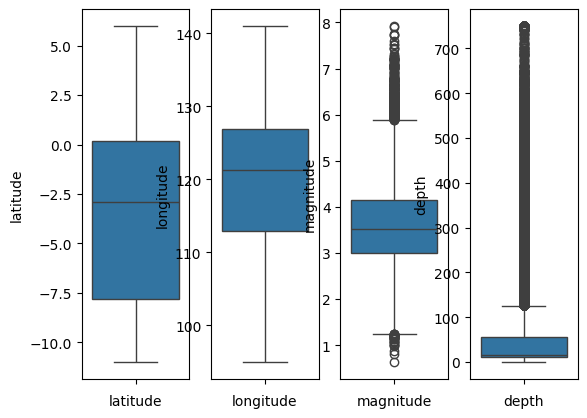

In [166]:
multi_boxplot(df_used, numeric_vars)

"From the boxplot analysis, we identified several outliers in the depth and magnitude variables. However, we cannot address these outliers solely based on the distribution of these variables, as some earthquakes may naturally have higher depths or magnitudes. Therefore, we will determine if the outliers fall within a reasonable range for earthquake depth and magnitude.

In [167]:
df_cleaned = df_used.copy()

# Create category variables depth and magnitude

## `depth`

In [168]:
# Categorize `depth` variables into 'Shallow', 'Intermediate', and 'Deep'
'''
- Shallow earthquakes are between 0 and 70km deep.
- Intermediate earthquakes are between 70 - 300km deep.
- Deep earthquakes are deeper than 300km.

Source: https://www.usgs.gov/programs/earthquake-hazards/determining-depth-earthquake
'''
depth_bins = [-.01, 70, 300, 800]
depth_labels = ['Shallow', 'Intermediate', 'Deep']
df_cleaned['depth_cat'] = pd.cut(df_cleaned['depth'], bins=depth_bins, labels=depth_labels).astype('category')

## `magnitude`

In [169]:
# Categorize `mag` variables into 6 groups
'''
Magnitude:
- 2.5 or less
- 2.5 to 5.4
- 5.5 to 6.0
- 6.1 to 6.9
- 7.0 to 7.9
- 8.0 or greater

Source: https://www.mtu.edu/geo/community/seismology/learn/earthquake-measure/magnitude/
'''
mag_bins = [-.01, 2.5, 5.4, 6.0, 6.9, 7.9, 9.5]
df_cleaned['mag_cat'] = pd.cut(df_cleaned['magnitude'], bins=mag_bins).cat.codes

## Summary of cleaned data

In [170]:
# 10 top rows
df_cleaned.head(10)

datetime  latitude   longitude  magnitude mag_type  \
0 2008-11-01 00:31:25.143741+00:00 -0.604440   98.895531   2.989742      MLv   
1 2008-11-01 01:34:29.660856+00:00 -6.611860  129.387220   5.507549       mb   
2 2008-11-01 01:38:14.802129+00:00 -3.650586  127.990680   3.539674      MLv   
3 2008-11-01 02:20:05.909515+00:00 -4.198925  128.097000   2.424314      MLv   
4 2008-11-01 02:32:18.756155+00:00 -4.091891  128.200470   2.410045      MLv   
5 2008-11-01 03:24:09.020131+00:00 -3.755193  127.382280   2.938879      MLv   
6 2008-11-01 03:34:47.510883+00:00 -3.889478  128.243190   2.218964      MLv   
7 2008-11-01 04:26:50.151996+00:00  0.486772   98.328484   3.853423      MLv   
8 2008-11-01 06:01:05.398042+00:00 -4.264244  127.661870   3.243451      MLv   
9 2008-11-01 06:23:00.287751+00:00 -3.432654  128.388600   2.317467      MLv   

   depth                     location       date week month  year depth_cat  \
0     20  Southern Sumatra, Indonesia 2008-11-01  W44    11  2008   Shallow   
1     30                    Banda Sea 2008-11-01  W44    11  2008   Shallow   
2      5             Seram, Indonesia 2008-11-01  W44    11  2008   Shallow   
3      5                    Banda Sea 2008-11-01  W44    11  2008   Shallow   
4     10                    Banda Sea 2008-11-01  W44    11  2008   Shallow   
5     10             Seram, Indonesia 2008-11-01  W44    11  2008   Shallow   
6     10             Seram, Indonesia 2008-11-01  W44    11  2008   Shallow   
7     16  Northern Sumatra, Indonesia 2008-11-01  W44    11  2008   Shallow   
8     10                    Banda Sea 2008-11-01  W44    11  2008   Shallow   
9     10             Seram, Indonesia 2008-11-01  W44    11  2008   Shallow   

   mag_cat  
0        1  
1        2  
2        1  
3        0  
4        0  
5        1  
6        0  
7        1  
8        1  
9        0

In [171]:
# Data information
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116727 entries, 0 to 116726
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   datetime   116727 non-null  datetime64[ns, UTC]
 1   latitude   116727 non-null  float64            
 2   longitude  116727 non-null  float64            
 3   magnitude  116727 non-null  float64            
 4   mag_type   116727 non-null  object             
 5   depth      116727 non-null  int64              
 6   location   116727 non-null  object             
 7   date       116727 non-null  datetime64[ns]     
 8   week       116727 non-null  object             
 9   month      116727 non-null  object             
 10  year       116727 non-null  object             
 11  depth_cat  116727 non-null  category           
 12  mag_cat    116727 non-null  int8               
dtypes: category(1), datetime64[ns, UTC](1), datetime64[ns](1), float64(3), int64(1), int8(1),

In [172]:
# Descriptive statistics for numerical variables
df_cleaned.describe()

latitude      longitude      magnitude          depth  \
count  116727.000000  116727.000000  116727.000000  116727.000000   
mean       -3.373360     119.192870       3.582797      50.998809   
min       -10.999324      95.002388       0.638354       0.000000   
25%        -7.838568     112.906254       2.991485      10.000000   
50%        -2.884020     121.293762       3.522375      16.000000   
75%         0.164928     126.887860       4.151254      56.000000   
max         5.999397     140.998291       7.923472     750.000000   
std         4.344322      10.826331       0.813087      81.533475   

                                date        mag_cat  
count                         116727  116727.000000  
mean   2018-04-16 17:05:24.480197376       0.939603  
min              2008-11-01 00:00:00       0.000000  
25%              2014-12-08 00:00:00       1.000000  
50%              2019-02-26 00:00:00       1.000000  
75%              2021-12-15 00:00:00       1.000000  
max              2024-11-25 00:00:00       5.000000  
std                              NaN       0.328891

In [173]:
# Descriptive statistics for non-numerical variables
df_cleaned.describe(exclude=np.number)

datetime mag_type  \
count                                116727   116727   
unique                                  NaN        9   
top                                     NaN        M   
freq                                    NaN    58550   
mean    2018-04-17 05:37:16.590154240+00:00      NaN   
min        2008-11-01 00:31:25.143741+00:00      NaN   
25%     2014-12-08 05:12:58.977632512+00:00      NaN   
50%     2019-02-26 14:54:31.785438976+00:00      NaN   
75%     2021-12-15 02:28:05.429764096+00:00      NaN   
max        2024-11-25 04:31:41.488329+00:00      NaN   

                             location                           date    week  \
count                          116727                         116727  116727   
unique                             56                            NaN      53   
top     Minahassa Peninsula, Sulawesi                            NaN     W39   
freq                            12192                            NaN    2895   
mean                              NaN  2018-04-16 17:05:24.480197376     NaN   
min                               NaN            2008-11-01 00:00:00     NaN   
25%                               NaN            2014-12-08 00:00:00     NaN   
50%                               NaN            2019-02-26 00:00:00     NaN   
75%                               NaN            2021-12-15 00:00:00     NaN   
max                               NaN            2024-11-25 00:00:00     NaN   

         month    year depth_cat  
count   116727  116727    116727  
unique      12      17         3  
top         11    2019   Shallow  
freq     11402   11445     91719  
mean       NaN     NaN       NaN  
min        NaN     NaN       NaN  
25%        NaN     NaN       NaN  
50%        NaN     NaN       NaN  
75%        NaN     NaN       NaN  
max        NaN     NaN       NaN

# Results and evaluation

In [174]:
# No Filter Year
df_filter = df_cleaned
df_filter.head(5)

datetime  latitude   longitude  magnitude mag_type  \
0 2008-11-01 00:31:25.143741+00:00 -0.604440   98.895531   2.989742      MLv   
1 2008-11-01 01:34:29.660856+00:00 -6.611860  129.387220   5.507549       mb   
2 2008-11-01 01:38:14.802129+00:00 -3.650586  127.990680   3.539674      MLv   
3 2008-11-01 02:20:05.909515+00:00 -4.198925  128.097000   2.424314      MLv   
4 2008-11-01 02:32:18.756155+00:00 -4.091891  128.200470   2.410045      MLv   

   depth                     location       date week month  year depth_cat  \
0     20  Southern Sumatra, Indonesia 2008-11-01  W44    11  2008   Shallow   
1     30                    Banda Sea 2008-11-01  W44    11  2008   Shallow   
2      5             Seram, Indonesia 2008-11-01  W44    11  2008   Shallow   
3      5                    Banda Sea 2008-11-01  W44    11  2008   Shallow   
4     10                    Banda Sea 2008-11-01  W44    11  2008   Shallow   

   mag_cat  
0        1  
1        2  
2        1  
3        0  
4        0

This section provides answers to the following questions:

[1. How many earthquakes have been recorded in Indonesia from Nov 2008 to Nov 2024?](#Q1) <br>
[2. What is the frequency of earthquakes every week throughout the year from Nov 2008 to Nov 2024?](#Q2) <br>
[3. How were Indonesia's earthquake magnitude and depth distributions from Nov 2008 to Nov 2024?](#Q3) <br>
[4. What is the correlation between the depth of an earthquake and its magnitude?](#Q4) <br>
[5. What is the primary earthquake depth and magnitude category in Indonesia?](#Q5) <br>
[6. How was the distributions of Indonesia's earthquake magnitude in each depth category from 2008 to 2024?](#Q6) <br>
[7. How many earthquakes occurred in each location in Indonesia from Nov 2008 to Nov 2024?](#Q7) <br>
[8. How many earthquakes with magnitude of 5.5 or higher occurred in each location in Indonesia from Nov 2008 to nov 2024?](#Q8) <br>

<a id='Q1'></a>
## 1. How many earthquakes have been recorded in Indonesia from Nov 2008 to Nov 2024?

In [105]:
print(f"From 2008 to 2024, {df_filter.shape[0]} earthquakes have been recorded in Indonesia.")

From 2008 to 2024, 116727 earthquakes have been recorded in Indonesia.


In [175]:
# Yearly number of recorded earthquakes from 2008 to 2024
df_year = df_filter.groupby(['year',])['datetime'].count().reset_index().rename(columns={'datetime':'count'})
df_year.sort_values(['year'])
df_year

year  count
0   2008    318
1   2009   3519
2   2010   6168
3   2011   4441
4   2012   6556
5   2013   3877
6   2014   4633
7   2015   5271
8   2016   5533
9   2017   6942
10  2018   9271
11  2019  11445
12  2020   9142
13  2021  11199
14  2022  10353
15  2023  11216
16  2024   6843

In [203]:
print(f"The portion of the number of recorded earthquakes in Nov 2008 and Nov 2024 is {df_year[df_year['year']>='2024']['count'].sum() / df_year['count'].sum()}.")

The portion of the number of recorded earthquakes in Nov 2008 and Nov 2024 is 0.05862396874759053.


In [204]:
fig = px.bar(
    df_year, y='year', x='count',
    text_auto='.2s',
    category_orders={'year': ['2024','2023','2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008']},
    color_discrete_sequence=px.colors.qualitative.Plotly,
    width=780
)

fig.update_traces(hovertemplate=('<b>%{y}</b><br>%{x:.0f}'))

fig.update_layout(
    title="<b>The Number of Recorded Earthquakes in Indonesia</b><br><sub>Year</sub>",
    xaxis_title="<sub>Between Nov 2008 and Nov 2024, Indonesia experienced 116,727 earthquakes,<br>However, the year with the highest number of recorded earthquakes was 2019.</sub>",
    yaxis_title="",
    plot_bgcolor='#fbfbfa'
)

fig.show()

<a id='Q2'></a>
## 2. What is the frequency of earthquakes every week throughout the year from Nov 2008 to Nov 2024?

In [178]:
df_year_week = df_filter.groupby(['year', 'week'])['datetime'].count().reset_index().rename(columns={'datetime':'count'})
df_year_week.sort_values(['year', 'week'])
df_year_week.head(10)

year week  count
0  2008  W01     13
1  2008  W44     27
2  2008  W45     67
3  2008  W46     30
4  2008  W47     25
5  2008  W48     36
6  2008  W49     28
7  2008  W50     21
8  2008  W51     42
9  2008  W52     29

In [202]:
fig = px.line(
    df_year_week, x='week', y='count',
    facet_row='year',
    width=1000
)

for i in range(10):
    fig['data'][i]['line']['color'] = '#437dce'

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

fig.update_traces(
    hovertemplate=("<b>%{x}</b><br>Frequency: %{y:.0f} ")
)

fig.update_layout(
    margin=dict(l=42, r=120),
    plot_bgcolor='#fbfbfa'
)

# hide and lock down yaxes
fig.update_yaxes(visible=False, fixedrange=True)

fig.show()

<a id='Q3'></a>
## 3. How were Indonesia's earthquake magnitude and depth distributions from Nov 2008 to Nov 2024?

In [205]:
fig = make_subplots(
    rows=1, cols=2
)

fig.add_trace(
    go.Histogram(
        x=df_filter['magnitude'],
        name="Magnitude",
        marker_color='#437dce'
    ),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=df_filter['depth'],
                 name="Depth",
                 marker_color='#437dce'
    ),
    row=1, col=2
)

fig.update_layout(
    title="<b>Distribution of Earthquake Magnitude and Depth<br>in Indonesia From Nov 2008 to Nov 2024",
    xaxis1_title="Magnitude",
    xaxis2_title="Depth (km)",
    yaxis1_title="Count",
    showlegend=False,
    plot_bgcolor='#fbfbfa'
)

fig.show()

<a id='Q4'></a>
## 4. What is the correlation between the depth of an earthquake and its magnitude?

In [181]:
print("Quantile 0.125:")
print(df_filter[['magnitude', 'depth']].quantile(0.125))

print("\nQuantile 0.875:")
print(df_filter[['magnitude', 'depth']].quantile(0.875))

Quantile 0.125:
magnitude     2.65796
depth        10.00000
Name: 0.125, dtype: float64

Quantile 0.875:
magnitude      4.56419
depth        122.00000
Name: 0.875, dtype: float64


In [206]:
fig = px.scatter(
    df_filter, x='magnitude', y='depth',
    width=780
)

fig.update_yaxes(autorange='reversed')

fig.update_traces(
    marker=dict(color='rgba(67, 125, 206, 0.1)'),
    hovertemplate=('Magnitude: %{x:.2f}<br>Depth: %{y:.0f}km')
)

fig.update_layout(
    title="<b>The Correlation Between the Depth and Magnitude of an Earthquake<br>in Indonesia between Nov 2008 to Nov 2024</b>",
    xaxis_title="Magnitude<br><sub>The depth and magnitude of an earthquake are not correlated. More than three quarters of earthquakes that<br>have been recorded had a magnitude between 2.5 and 5 and were at a depth of no more than 125km.</sub>",
    yaxis_title="Depth (km)",
    plot_bgcolor='#fbfbfa'
)

fig.show()

<a id='Q5'></a>
## 5. What is the primary earthquake depth and magnitude category in Indonesia?

In [184]:
# mag_bins = [0, 2.5, 5.4, 6.0, 6.9, 7.9, 9.5]
df_depth_mag = df_filter[df_filter['mag_cat']==0].groupby(['depth_cat'])['date'].count().reset_index().rename(columns={'date':'(0, 2.5]'})
df_depth_mag['(2.5, 5.4]'] = df_filter[df_filter['mag_cat']==1].groupby(['depth_cat'])['date'].count().reset_index().rename(columns={'date':'(2.5, 5.4]'})['(2.5, 5.4]']
df_depth_mag['(5.4, 6.0]'] = df_filter[df_filter['mag_cat']==2].groupby(['depth_cat'])['date'].count().reset_index().rename(columns={'date':'(5.4, 6.0]'})['(5.4, 6.0]']
df_depth_mag['(6.0, 6.9]'] = df_filter[df_filter['mag_cat']==2].groupby(['depth_cat'])['date'].count().reset_index().rename(columns={'date':'(6.0, 6.9]'})['(6.0, 6.9]']
df_depth_mag['(6.9, 7.9]'] = df_filter[df_filter['mag_cat']==2].groupby(['depth_cat'])['date'].count().reset_index().rename(columns={'date':'(6.9, 7.9]'})['(6.9, 7.9]']
df_depth_mag['(6.9, 9.5]'] = df_filter[df_filter['mag_cat']==2].groupby(['depth_cat'])['date'].count().reset_index().rename(columns={'date':'(6.9, 9.5]'})['(6.9, 9.5]']
df_depth_mag = df_depth_mag.set_index('depth_cat')

<ipython-input-184-256ab12ce050>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-184-256ab12ce050>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-184-256ab12ce050>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-184-256ab12ce050>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to 

In [207]:
colorscale = [
    [0, '#e4e9f0'],
    [0.3, '#92b3e2'],
    [1, '#437dce']
]
fig = px.imshow(
    df_depth_mag,
    width=780,
    text_auto=True,
    color_continuous_scale=colorscale
)

fig.update_layout(
    title="<b>The Frequencies of Earthquakes Based on Depth and Magnitude<br>in Indonesia between Nov 2008 to Nov 2024</b>",
    xaxis_title="Magnitude<br><sub>Earthquakes that were recorded occurred at a shallow depth of no more than 70 km and have a magnitude<br>ranging from 2.5 to 5.4, which typically can be felt but only result in minor damage.</sub>",
    yaxis_title="Depth",
    plot_bgcolor='#fbfbfa'
)
fig.update(data=[{
    'hovertemplate': "Magnitude: %{x}<br>Depth: %{y}<extra></extra>"}])

fig.update_coloraxes(showscale=False)

fig.show()

<a id='Q6'></a>
## 6. How was the distributions of Indonesia's earthquake magnitude in each depth category from 2008 to 2024??

In [187]:
df_filter[['depth', 'magnitude']].describe()

depth      magnitude
count  116727.000000  116727.000000
mean       50.998809       3.582797
std        81.533475       0.813087
min         0.000000       0.638354
25%        10.000000       2.991485
50%        16.000000       3.522375
75%        56.000000       4.151254
max       750.000000       7.923472

In [208]:
fig = px.histogram(df_filter, x='magnitude', facet_row='depth_cat')

for i in range(3):
    fig['data'][i]['marker']['color'] = '#437dce'

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

fig.update_traces(
    hovertemplate=("Magnitude: %{x}<br>Number of earthquakes recorded: %{y:.0f} ")
)

fig.update_layout(
    title="<b>Indonesia's Earthquake Magnitude in Each Depth Category From Nov 2008 to Nov 2024</b>",
    xaxis_title="Magnitude</br><sub>Earthquakes that occur at shallow depths are more frequent,<br>but those that occur at deeper depths tend to have higher magnitudes.</sub>",
    showlegend=False,
    plot_bgcolor='#fbfbfa'
)

fig.update_yaxes(visible=False, fixedrange=True)

fig.show()

<a id='Q7'></a>
## 7. How many earthquakes occurred in each location in Indonesia from Nov 2008 to Nov 2024?

In [190]:
df_location = df_filter.groupby(['location'])[['latitude', 'longitude']].median().reset_index().rename(columns={'latitude':'median_latitude', 'longitude':'median_longitude'})
df_location_count = df_filter.groupby(['location'])['datetime'].count().reset_index().rename(columns={'datetime':'count'})
df_location_count = pd.merge(
    df_location, df_location_count,
    how='inner', on=['location']
)
df_location_count['location_short'] = df_location_count['location'].str.split(",", expand = True)[0] # get the location detail before comma, for simple visualization
df_location_count.loc[df_location_count['count']<df_location_count['count'].quantile(0.8), 'location_short']='' # remove label of locations that have number of earthquake less quantile 0.8, for simple visualization
df_location_count.head()

location  median_latitude  median_longitude  count  \
0                    Arafura Sea        -9.476777        134.877449     14   
1  Aru Islands Region, Indonesia        -5.343774        133.695092    168   
2         Bali Region, Indonesia        -8.302044        115.449444   1562   
3                       Bali Sea        -7.849747        117.289883    878   
4                      Banda Sea        -6.534186        129.374939   6289   

  location_short  
0                 
1                 
2                 
3                 
4      Banda Sea

In [209]:
fig = px.scatter_geo(df_location_count,
                    lat='median_latitude',  # median latitude for all locations within the same F-E region
                    lon='median_longitude',  # median longitude for all locations within the same F-E region
                    size='count',
                    text='location_short',
                    hover_name='location',
                    hover_data={'median_latitude':False,'median_longitude':False, 'location_short':False}) # Set to plot size as number of strikes

fig.update_geos(
    visible=False, resolution=110,
    showcountries=True, countrycolor="#bfbfbf" # country outline
)

fig.update_traces(
    textfont_size=10, # text size for marker; in this visualization: location_short
    marker=dict(color='rgba(67, 125, 206, 0.85)')
)

fig.update_layout(
    title_text = "<b>The Frequency of Earthquakes Recorded in Each Region<br>in Indonesia From Nov 2008 to Nov 2024.</b>",
    geo=dict(
        lonaxis = dict(
            range= [93, 144],
            dtick = 5
        ),
        lataxis = dict (
            range= [-13, 10],
            dtick = 5
        )
    )
)

fig.show()

The dataset includes 56 earthquake zones. The size of the bubbles on the map indicates the number of earthquakes in each region. Between Nov 2008 and Nov 2024, the area with the highest number of earthquakes was the Minahasa Peninsula.

<a id='Q8'></a>
## 8. How many earthquakes with magnitude of 5.5 or higher occurred in each location in Indonesia from Nov 2008 to Nov 2024?
In highly populated areas, an earthquake measuring 5.5 on the magnitude scale can potentially result in significant damage and Slight damage to buildings and other structures.<sup>[source](https://www.mtu.edu/geo/community/seismology/learn/earthquake-measure/magnitude/)</sup>

In [192]:
df_location = df_filter[df_filter['magnitude']>=5.5].groupby(['location'])[['latitude', 'longitude']].median().reset_index().rename(columns={'latitude':'median_latitude', 'longitude':'median_longitude'})
df_location_count = df_filter.groupby(['location'])['datetime'].count().reset_index().rename(columns={'datetime':'count'})
df_location_count = pd.merge(
    df_location, df_location_count,
    how='inner', on=['location']
)
df_location_count['location_short'] = df_location_count['location'].str.split(",", expand = True)[0] # get the location detail before comma, for simple visualization
df_location_count.loc[df_location_count['count']<df_location_count['count'].quantile(0.8), 'location_short']='' # remove label of locations that have number of earthquake less quantile 0.8, for simple visualization
df_location_count.head()

location  median_latitude  median_longitude  count  \
0                    Arafura Sea        -9.752242        134.140861     14   
1  Aru Islands Region, Indonesia        -5.632209        133.743974    168   
2         Bali Region, Indonesia        -8.266956        114.531868   1562   
3                       Bali Sea        -7.004141        116.540836    878   
4                      Banda Sea        -6.373530        129.115036   6289   

  location_short  
0                 
1                 
2                 
3                 
4      Banda Sea

In [210]:
fig = px.scatter_geo(df_location_count,
                    lat='median_latitude',  # median latitude for all locations within the same F-E region
                    lon='median_longitude',  # median longitude for all locations within the same F-E region
                    size='count',
                    text='location_short',
                    hover_name='location',
                    hover_data={'median_latitude':False,'median_longitude':False, 'location_short':False}) # Set to plot size as number of strikes

fig.update_geos(
    visible=False, resolution=110,
    showcountries=True, countrycolor="#bfbfbf" # country outline
)

fig.update_traces(
    textfont_size=10,  # text size for marker; in this visualization: location_short
    marker=dict(color='rgba(67, 125, 206, 0.85)')
)

fig.update_layout(
    title_text = "<b>The Frequency of Earthquakes with Magnitude 5.5 or Higher<br>Recorded in Each Region in Indonesia From Nov 2008 to Nov 2024.</b>", # Create a Title
    geo=dict(
        lonaxis = dict(
            range= [93, 144],
            dtick = 5
        ),
        lataxis = dict (
            range= [-13, 10],
            dtick = 5
        )
    )
)
fig.show()

The map shows the frequency of all earthquakes recorded between Nov 2008 and Nov 2024, while the above map shows earthquakes with a magnitude of 5.5 or higher. The two maps show relatively similar bubble sizes for each region, but the positions of the bubbles are different.

The bubbles represent the median latitude and longitude of all earthquakes in each region. Compared to the map, on the map above, the median location of earthquakes in the Minahasa Peninsula region is shifted to the east, suggesting that more damaging earthquakes mainly occurred around the eastern side of the Minahasa Peninsula, near the Molucca Sea.